<a href="https://colab.research.google.com/github/i-akash/Data-science/blob/master/practice/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import  RFE
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.svm import SVC

%matplotlib inline

In [0]:
dataset=pd.read_csv('heart.csv')
dataset=dataset.drop([''],axis=1)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


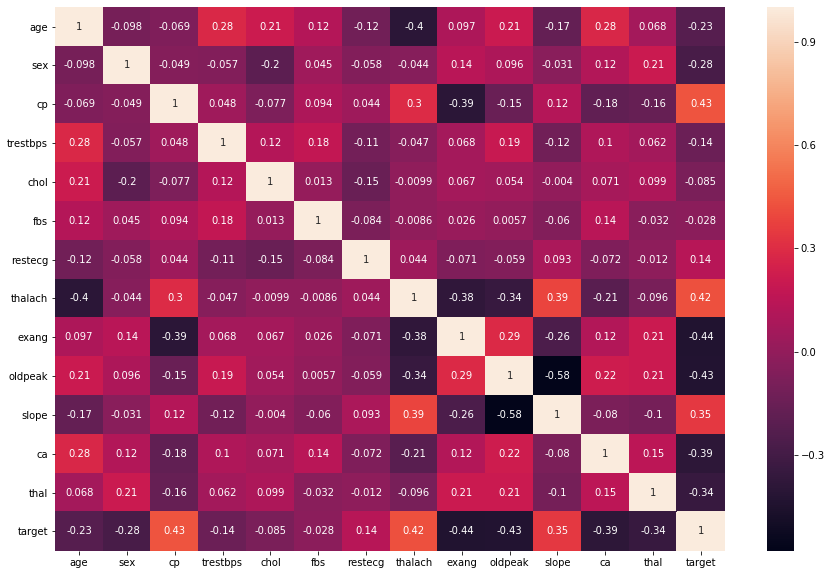

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True)

In [0]:

Y=dataset['target']
X=dataset.loc[:,dataset.columns!='target']


In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.15)

In [0]:
os=SMOTE(random_state=0)

print(len(x_train))
columns = x_train.columns
print(x_train.shape)
os_data_X,os_data_y=os.fit_sample(x_train,y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y=pd.DataFrame(data=os_data_y,columns=['target'])

257
(257, 13)


In [0]:
acur=[]
support=[]
for i in range(1,14):
  rl=LogisticRegression()
  rfe=RFE(rl,i)
  rfe.fit(os_data_X,os_data_y)
  support.append(rfe.support_)
  all_cols=X.columns.values
  selected_features=[all_cols[i] for i in range(len(rfe.support_))  if rfe.support_[i]==True]


  x_set=os_data_X[selected_features]

  logReg=LogisticRegression()
  logReg.fit(x_set,os_data_y)

  y_predict=logReg.predict(x_test[selected_features])
  cm=metrics.accuracy_score(y_test,y_predict)
  acur.append(cm)



In [0]:
acur

[0.6739130434782609,
 0.6739130434782609,
 0.7391304347826086,
 0.7608695652173914,
 0.8478260869565217,
 0.9130434782608695,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869]

In [0]:
s=support[5]
selected_featur=[all_cols[i] for i in range(len(s))  if s[i]==True]
selected_featur

['sex', 'cp', 'exang', 'oldpeak', 'slope', 'ca']

In [0]:
x_set=os_data_X[selected_featur]

logReg=LogisticRegression()
logReg.fit(os_data_X[selected_featur],os_data_y)

y_predict=logReg.predict(x_test[selected_featur])
ac=metrics.accuracy_score(y_test,y_predict)
cm=metrics.confusion_matrix(y_test,y_predict)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
ac

0.9130434782608695

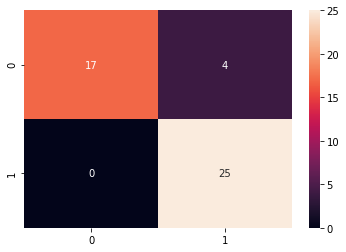

In [0]:

sns.heatmap(cm,annot=True)